In [1]:
import os
import numpy as np
import pandas as pd
from operator import add, sub
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = ...
path_dir = [p for p in os.listdir(path) if p.startswith("results")]
print(path_dir)

mAP_05 = []
mAP_05_95 = []
loss = []
P = []
R = []
sd_mAP_05 = []
sd_mAP_05_95 = []
sd_loss = []
sd_P = []
sd_R = []

for p in path_dir:
    results = pd.read_csv(os.path.join(path,p), index_col=False)
    for idx, c in enumerate(results.columns):
        results.rename(columns={c:c.replace(" ", "")},inplace=True)
    for metric in results.columns:
        if metric.endswith("mAP_0.5"):
            mAP_05.append(results[metric].tolist())
        elif metric.endswith("mAP_0.5:0.95"):
            mAP_05_95.append(results[metric].tolist())
        elif metric.endswith("precision"):
            P.append(results[metric].tolist())
        elif metric.endswith("recall"):
            R.append(results[metric].tolist())
        elif metric.endswith("obj_loss") or metric.endswith("box_loss"):
            loss.append(results[metric].tolist())
            
sd_mAP_05.append(np.std(mAP_05,axis=0))
sd_mAP_05_95.append(np.std(mAP_05_95,axis=0))
sd_P.append(np.std(P, axis=0))
sd_R.append(np.std(R, axis=0))
sd_loss.append(np.std(loss, axis=0))

mean_mAP_05 = np.sum(mAP_05, axis=0)/len(mAP_05)
mean_mAP_05_95 = np.sum(mAP_05_95, axis=0)/len(mAP_05_95)
mean_P = np.sum(P, axis=0)/len(P)
mean_R = np.sum(R, axis=0)/len(R)

mean_loss = np.sum(loss, axis=0)/len(mAP_05)

['results_fold_0.csv', 'results_fold_1.csv', 'results_fold_2.csv', 'results_fold_3.csv', 'results_fold_4.csv']


In [3]:
to_plot = []
to_plot.append((mean_mAP_05, mean_mAP_05_95, mean_P, mean_R, mean_loss))

## Calculate upper and lower confidence threshold

In [4]:
upper_mAP_05 =  list(map(add, mean_mAP_05, sd_mAP_05[0])) 
lower_mAP_05 = list(map(sub, mean_mAP_05, sd_mAP_05[0]))

upper_mAP_05_95 = list(map(add, mean_mAP_05_95, sd_mAP_05_95[0]))
lower_mAP_05_95 = list(map(sub, mean_mAP_05_95, sd_mAP_05_95[0]))

upper_P = list(map(add, mean_P, sd_P[0]))
lower_P = list(map(sub, mean_P, sd_P[0]))

upper_R = list(map(add, mean_R, sd_R[0]))
lower_R = list(map(sub, mean_R, sd_R[0]))

upper_loss = list(map(add, mean_loss, sd_loss[0]))
lower_loss = list(map(sub, mean_loss, sd_loss[0]))

upper_list = []
lower_list = []
upper_list.append((upper_mAP_05,upper_mAP_05_95,upper_P,upper_R, upper_loss))
lower_list.append((lower_mAP_05,lower_mAP_05_95,lower_P,lower_R, lower_loss))

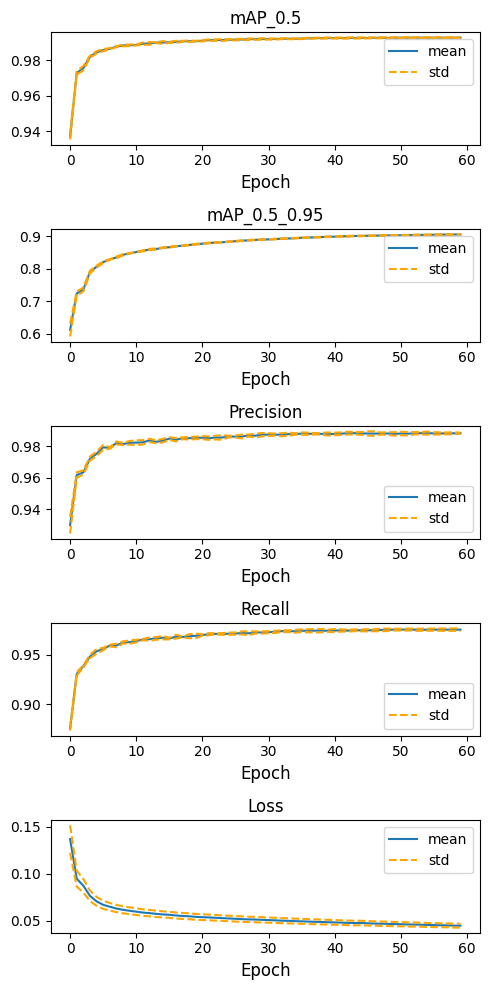

In [6]:
fig = plt.figure(figsize=(5,10))
titles = ["mAP_0.5","mAP_0.5_0.95","Precision","Recall", "Loss"]
epochs = len(to_plot[0][0])
for i in range(len(titles)):
    ax = fig.add_subplot(5,1,i+1)
    ax.plot(np.arange(epochs),to_plot[0][i], label="mean")
    ax.plot(np.arange(epochs),upper_list[0][i],"--",color="orange", label="std")
    ax.plot(np.arange(epochs),lower_list[0][i],"--", color="orange")
    ax.set_xlabel("Epoch", fontsize=12)
    ax.set_title(titles[i])
    plt.legend()
plt.tight_layout()
plt.savefig("K-Fold_Results")
plt.show()

## Save one fig

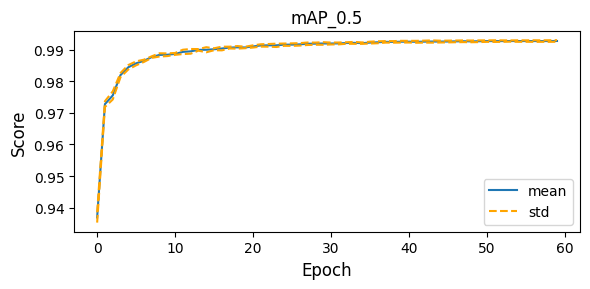

In [14]:
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(epochs),to_plot[0][0], label="mean")
ax.plot(np.arange(epochs),upper_list[0][0],"--",color="orange", label="std")
ax.plot(np.arange(epochs),lower_list[0][0],"--", color="orange")
ax.set_xlabel("Epoch", fontsize=12)
ax.set_ylabel("Score", fontsize=12)
ax.set_title(titles[0])
plt.legend()
plt.tight_layout()
# plt.savefig("K-Fold_mAP_05")
plt.show()